# The Interplay of Compile-time Options and Run-time Options for Performance Prediction

#### Import libraries

In [5]:
import os

import pandas as pd

import numpy as np

from scipy import stats
import scipy.stats as sc
from scipy.cluster.hierarchy import linkage, leaves_list

import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import seaborn as sns

import matplotlib.pyplot as plt

##### Variables to keep

In [6]:
data_dir = "../data/"

# x264

#### Variables to change

In [7]:
name_system = "x264"

In [13]:
list_dir = os.listdir(data_dir+name_system)
list_dir.remove('ctime_options.csv')
list_dir

inputs = os.listdir(data_dir+name_system+'/'+list_dir[0])
nb_inputs = len(inputs)

ctime_data = pd.read_csv(data_dir+name_system+'/'+'ctime_options.csv').set_index("index")

ctime_data

,--disable-asm,--enable-shared,--disable-avs,--disable-opencl,--disable-swscale,--disable-lavf,--disable-ffms,--disable-gpac,--disable-lsmash
index,,,,,,,,,
1,0,0,1,1,1,1,0,0,0
2,1,1,1,1,1,1,1,1,1
3,1,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,1,1,1
5,0,0,0,1,0,1,0,1,1
6,0,1,0,1,0,1,1,1,0
7,0,0,0,0,0,1,1,0,1
8,1,1,0,1,0,1,0,1,1
9,0,1,1,0,1,0,0,0,1


In [36]:
data = []
input_aggreg = dict()
dim ="fps"

#for index_input in range(len(inputs)):
index_input = 0

res_aggreg = []

for i in range(len(list_dir)):
    index = int(list_dir[i])
    val = ctime_data.iloc[i]

    loc = data_dir+name_system+'/'+list_dir[i]+'/'+inputs[index_input]
    df_runtime = pd.read_csv(loc)
    df_runtime = df_runtime.drop(['configurationID','frames','size','kbs','time'], axis = 1)
    
    df_runtime_modif = pd.get_dummies(df_runtime.drop([dim], axis=1))
    df_runtime_modif[dim] = df_runtime[dim]
    
    for rt_config_id in range(df.shape[0]):
        res_aggreg.append(list(tuple(val) + tuple(df_runtime_modif.loc[rt_config_id])))
res_df = pd.DataFrame(res_aggreg)
res_df.columns = list(tuple(ctime_data.columns) + tuple(df_runtime_modif.columns))

In [37]:
res_df

,--disable-asm,--enable-shared,--disable-avs,--disable-opencl,--disable-swscale,--disable-lavf,--disable-ffms,--disable-gpac,--disable-lsmash,cabac,...,scenecut_40,scenecut_None,rc_lookahead_10,rc_lookahead_20,rc_lookahead_30,rc_lookahead_40,rc_lookahead_50,rc_lookahead_60,rc_lookahead_None,fps
0,0,0,1,1,1,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1135.55
1,0,0,1,1,1,1,0,0,0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,563.54
2,0,0,1,1,1,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,792.76
3,0,0,1,1,1,1,0,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,202.74
4,0,0,1,1,1,1,0,0,0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,231.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,1,0,1,1,0,0,1,0,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.67
10046,1,0,1,1,0,0,1,0,0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.74
10047,1,0,1,1,0,0,1,0,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,67.30
10048,1,0,1,1,0,0,1,0,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,43.08


In [38]:
X = res_df.drop([dim], axis=1)
y = res_df[dim]

rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [42]:
res = pd.Series(rf.feature_importances_, res_df.columns[:-1])
res

--disable-asm          0.051986
--enable-shared        0.050638
--disable-avs          0.034844
--disable-opencl       0.029294
--disable-swscale      0.057753
--disable-lavf         0.045450
--disable-ffms         0.053036
--disable-gpac         0.055387
--disable-lsmash       0.058326
cabac                  0.004866
ref                    0.060113
subme                  0.361434
mixed_ref              0.000663
me_range               0.001566
trellis                0.061324
8x8dct                 0.006297
fast_pskip             0.000428
chroma_qp_offset       0.000174
bframes                0.003201
weightp                0.005131
mbtree                 0.009345
qpmax                  0.000000
aq-mode                0.000280
deblock_0:0:0          0.000795
deblock_1:0:0          0.000865
analyse_0:0            0.004511
analyse_0x113:0x113    0.000142
analyse_0x3:0x113      0.000122
analyse_0x3:0x133      0.000160
analyse_0x3:0x3        0.000171
me_dia                 0.000690
me_hex  

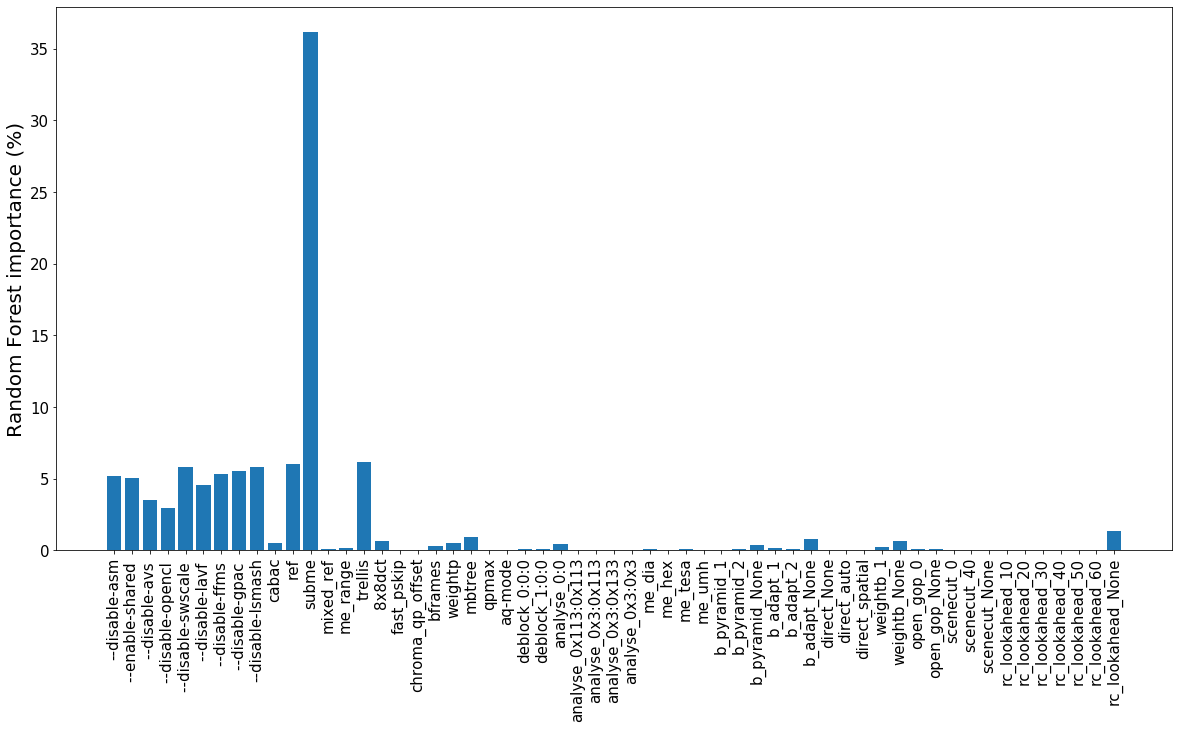

In [80]:
plt.figure(figsize = (20,10))
plt.ylabel("Random Forest importance (%)", size = 20)
plt.yticks(size=15)
plt.bar(range(len(res.values)), 100*res)
plt.xticks(range(len(res.values)), res.index, rotation='vertical', size =15)
plt.show()

part of the importance due to compile-time options

In [73]:
prop_imp_compile = np.sum(res[0:9])

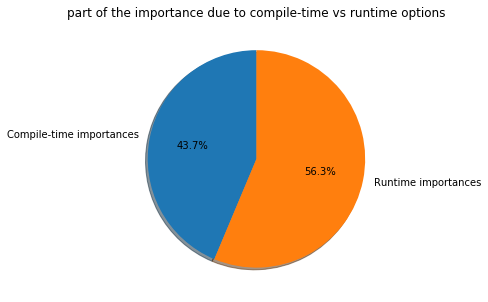

In [78]:
props = np.array((prop_imp_compile, 1-prop_imp_compile), np.float64)

plt.figure(figsize=(5,5))
plt.pie(props,
        startangle = 90,
        labels = list(("Compile-time importances", "Runtime importances")),
        autopct='%.1f%%', # Arrondi du pourcentage à l'entier
        shadow = True)
plt.title("part of the importance due to compile-time vs runtime options")
plt.show()